In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gold-price-data/gld_price_data.csv


**Importing the Libraries**

In [2]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

**Data Collection and Processing**

In [3]:
# Loading the csv data to a Pandas DataFrame
df=pd.read_csv("/kaggle/input/gold-price-data/gld_price_data.csv")

In [4]:
#Print First 5 Rows
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
# Explore Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
df.shape

(2290, 6)

In [7]:
# Explore statistic of data
print(df.describe())

               SPX          GLD          USO          SLV      EUR/USD
count  2290.000000  2290.000000  2290.000000  2290.000000  2290.000000
mean   1654.315776   122.732875    31.842221    20.084997     1.283653
std     519.111540    23.283346    19.523517     7.092566     0.131547
min     676.530029    70.000000     7.960000     8.850000     1.039047
25%    1239.874969   109.725000    14.380000    15.570000     1.171313
50%    1551.434998   120.580002    33.869999    17.268500     1.303297
75%    2073.010070   132.840004    37.827501    22.882500     1.369971
max    2872.870117   184.589996   117.480003    47.259998     1.598798


In [8]:
# Checking for Missing Values
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

**Correlation**

1-Positive Correlation

2-Negative Correlation

In [9]:
df['Date'] = pd.to_datetime(df['Date'])


In [10]:
correlation = df.corr()

<Axes: >

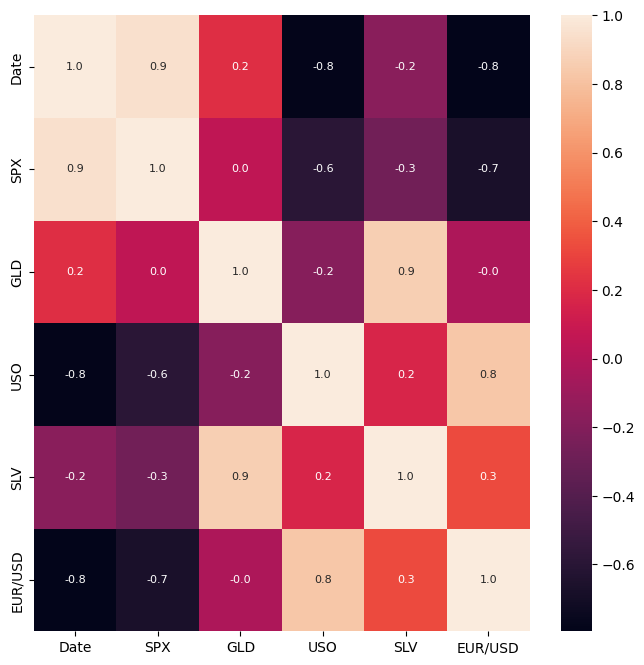

In [11]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,annot=True,fmt=".1f",annot_kws={"size":8})

/tmp/ipykernel_18/934529333.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["GLD"],color="green")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='GLD', ylabel='Density'>

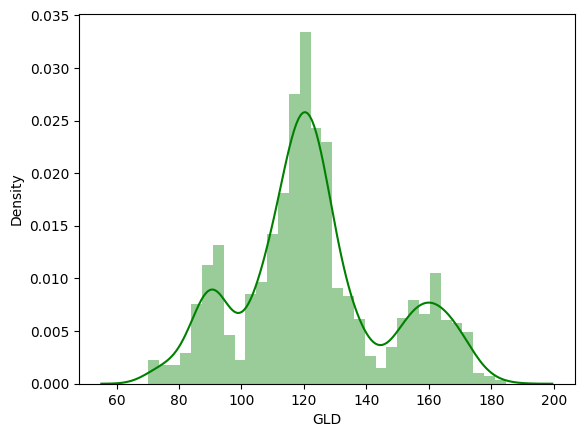

In [12]:
# Distributon of GLD price
sns.distplot(df["GLD"],color="green")

**Spliting the Features and Target**

In [13]:
X=df.drop(["Date","GLD"],axis=1)
Y=df["GLD"]

In [14]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [15]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


**Splitting into Training data and Test Data**

In [16]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

**Model Training:Random Forest**

In [17]:
Model=RandomForestRegressor(n_estimators=100)

In [18]:
#Tranining the model
Model.fit(X_train,Y_train)

RandomForestRegressor()

**Model Evaluation**

In [19]:
# Prediction on Test Data
Test_Prediction=Model.predict(X_test)

In [20]:
# R square error
error_score=metrics.r2_score(Y_test,Test_Prediction)
print("R squared error : ",error_score)

R squared error :  0.9894173316348025


**Compare Actual and Predicted values**

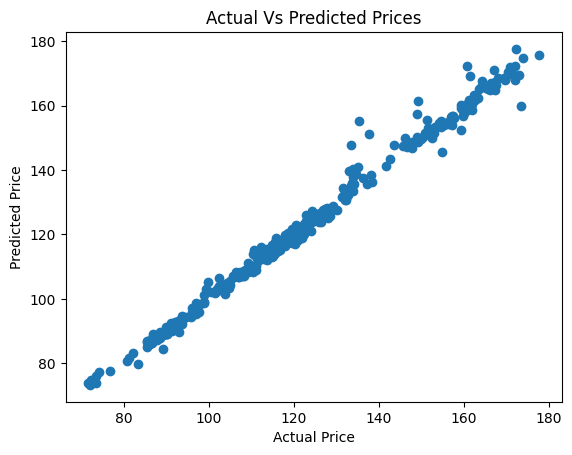

In [21]:
plt.scatter(Y_test,Test_Prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Vs Predicted Prices")
plt.show()